In [83]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from Bio import SeqIO

In [108]:
#define function that identifies locations of all dipeptides encoding potential
#+1 stops in any sequence

def map_stop_opportunity_distances(sequence):
    stopdipeps = ['LI','LM','LK','LT','LS','LR','LV','LE','LA','LT','LG',
              'II','IM','IK','IT','IS','IR','IV','IE','IA','IT','IG',
              'VI','VM','VK','VT','VS','VR','VV','VE','VA','VT','VG']
    seqdipeps = [sequence[n:n+2] for n in range(len(sequence)-1)]
    stop_opportunities = [p for p,v in enumerate(seqdipeps) if v in stopdipeps]
    return [stop_opportunities[n+1]-stop_opportunities[n] for n in range(len(stop_opportunities)-1)]

In [97]:
#read in alphavirus protein sequences from uniprot
seqs = []
with gzip.open("uniparc_alphavirus_2024_08_08.fasta.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        seqs.append(str(record.seq))

In [116]:
collected_stop_opportunity_distances = []
for s in seqs:
    collected_stop_opportunity_distances += map_stop_opportunity_distances(s)
    

In [122]:
len(collected_stop_opportunity_distances)

1078164

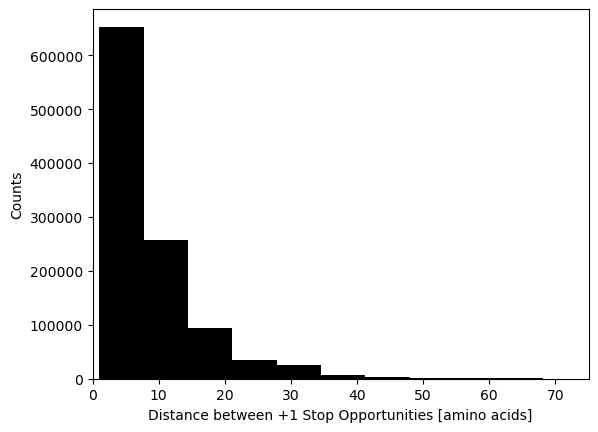

In [130]:
fig,ax = plt.subplots()
ax.hist(collected_stop_opportunity_distances,color='black',bins=100)
ax.set_xlabel('Distance between +1 Stop Opportunities [amino acids]')
ax.set_xlim((0,75))
ax.set_ylabel('Counts')
plt.show()

In [134]:
print(np.mean(collected_stop_opportunity_distances))

8.388682055791142
